In [42]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import os

#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [230]:
plt.style.use('default')
#plt.style.use('fivethirtyeight')
#plt.style.use('bmh')

In [91]:
df_orders = pd.read_csv("../data/clean/orders.csv")
df = pd.read_csv("../data/clean/aggregate_df.csv")

In [5]:
df = pd.read_csv("../data/clean/aggregate_df.csv")

df_customers = pd.read_csv("../data/clean/customers.csv")
df_orders = pd.read_csv("../data/clean/orders.csv")
df_items = pd.read_csv("../data/clean/order_items.csv")
df_products = pd.read_csv("../data/clean/products.csv")


(   Customers.id Customers.fname Customers.lname Customers.company  \
 0           797         Christy            Dill          Company0   
 1             3            John           Smith          Company1   
 2             4           James        Anderson        Individual   
 3             5         Abraham          Pollak          Company3   
 4             7          Peggy         Thompson        Individual   
 
   Customers.create_date  Customers.mailing Customers.last_modified  
 0   2015-03-10 20:18:44                  0     2015-07-24 18:58:26  
 1   2013-12-03 16:45:39                  0     2015-07-24 18:59:14  
 2   2013-12-11 16:44:23                  0     2015-07-24 18:30:46  
 3   2013-12-12 15:19:59                  0     2015-07-24 18:58:36  
 4   2013-12-27 14:52:27                  0     2015-07-24 18:46:57  ,
    Orders.id  Orders.customer_id Orders.company Orders.order_number  \
 0       3758                 797       Company0                3758   
 1         23

In [37]:
print("=== MAIN DF ===")
df.info()
print("\n=== CUSTOMERS ===")
df_customers.info()
print("\n=== ORDERS ===")
df_orders.info()
print("\n=== ORDER ITEMS ===")
df_items.info()
print("\n=== PRODUCTS ===")
df_products.info()

=== MAIN DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customers.id                   4194 non-null   object  
 1   Customers.fname                4194 non-null   object  
 2   Customers.lname                4194 non-null   object  
 3   Customers.company              4194 non-null   object  
 4   Customers.create_date          4194 non-null   object  
 5   Customers.mailing              4194 non-null   int64   
 6   Customers.last_modified        4194 non-null   object  
 7   Orders.id                      4194 non-null   object  
 8   Orders.customer_id             4194 non-null   object  
 9   Orders.company                 730 non-null    object  
 10  Orders.order_number            4194 non-null   object  
 11  Orders.reorder_id              82 non-null     object  
 12  Orders.subtotal   

In [199]:
df.head(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.mailing,Customers.last_modified,Orders.id,Orders.customer_id,Orders.company,Orders.order_number,Orders.reorder_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_date,Orders.payment_method,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.reorder_frequency,Products.id,Products.status,Products.vendor,Products.import_id,Products.name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.last_modified,Products.taxable,Products.shopping_brand,Products.shopping_color,Products.unit,Products.case_qty,Products.family_id,is_individual,is_business
0,797,Christy,Dill,Company0,2015-03-10 20:18:44,0,2015-07-24 18:58:26,3758,797,Company0,3758,NaN,57.20,0.0,9.95,13.0,2.86,No Discount,NaN,64.29,NaN,fedex,Ground,Paid,2015-03-10 20:24:59,authorize.net,64.29,Completed,2015-03-10 20:24:59,2015-08-06 13:40:10,2015-03-11 19:08:42,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,NaN,2310.0,Active,Vendor_A,3.0,"Basic Steel Rollators,Green",80.70,57.64,NaN,44.00,2016-05-13 18:05:23,1.0,MEDLINE,Green,EA,1.0,PF61071,False,True
1,3,John,Smith,Company1,2013-12-03 16:45:39,0,2015-07-24 18:59:14,23,3,Company1,23,NaN,20.00,0.0,9.99,NaN,NaN,No Discount,NaN,29.99,NaN,fedex,Ground,Paid,2013-12-03 17:07:35,authorize.net,29.99,Completed,2013-12-03 17:07:35,2015-08-25 18:49:43,2013-12-03 20:30:21,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,NaN,177.0,New,Vendor_A,3.0,Urinary Drain Bags,14.41,10.29,5.0,1.87,2016-05-04 13:52:35,1.0,MEDLINE,NaN,EA,1.0,PF02132,False,True
2,3,John,Smith,Company1,2013-12-03 16:45:39,0,2015-07-24 18:59:14,9531,3,Company1,9531,NaN,68.78,0.0,9.95,NaN,NaN,No Discount,NaN,78.73,NaN,manual,Standard Shipping,Paid,2015-12-08 19:40:52,authorize.net,78.73,Shipped,2015-12-08 19:40:52,2015-12-15 21:04:47,NaN,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,NaN,1.0,Active,Vendor_A,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,NaN,52.50,2016-05-13 18:05:23,1.0,MEDLINE,Blue,CS,800.0,PF00342,False,True
3,4,James,Anderson,Individual,2013-12-11 16:44:23,0,2015-07-24 18:30:46,29,4,NaN,29,NaN,19.56,0.0,9.95,NaN,NaN,No Discount,NaN,29.55,NaN,NaN,Ground,Paid,2013-12-11 16:44:23,Credit Card,29.55,Completed,2013-12-11 16:44:23,2015-08-25 18:49:43,2013-12-11 22:15:32,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,NaN,983.0,Active,Vendor_A,3.0,Basket for 2-Button Walkers,27.38,19.56,NaN,12.62,2016-05-07 04:31:15,1.0,MEDLINE,NaN,EA,1.0,PF04970,True,False
4,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,30,5,Company3,30,NaN,36.05,0.0,9.95,NaN,NaN,No Discount,NaN,46.00,NaN,fedex,Ground,Paid,2013-12-12 15:19:59,Credit Card,46.00,Completed,2013-12-12 15:19:59,2015-08-25 18:49:43,2013-12-12 19:13:43,40,30,991.0,Tens Units,1,36.05,25.75,NaN,991.0,New,Vendor_A,3.0,TENS 3000 Analog Unit,50.47,36.05,NaN,25.75,2016-05-04 13:52:35,1.0,ROSCOE MEDICAL INC,NaN,EA,1.0,PF03045,False,True
5,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,226,5,Company3,226,NaN,44.46,0.0,9.95,NaN,NaN,No Discount,NaN,54.41,54.41,fedex,Ground,Unpaid,NaN,NaN,NaN,Completed,2014-03-09 15:55:27,2015-08-06 13:40:10,2014-03-10 20:10:09,341,226,310.0,"FitRight Ultra Protective Underwear, Large",1,44.46,32.22,2.0,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
6,5,Abraham,Pollak,Company3,2013-12-12 15:19:59,0,2015-07-24 18:58:36,1658,5,Company3,1658,NaN,14.63,0.0,9.95,NaN,NaN,No Discount,NaN,24.58,24.58,fedex,Ground,Paid,2014-09-10 15:40:55,Credit Card,24.58,Completed,2014-09-10

In [202]:
# overview of the dataframe
    
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


'Shape'

(4194, 57)

'Description'

,count,mean,std,min,25%,50%,75%,max
Customers.mailing,4194.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
Orders.subtotal,4194.0,131.93,231.16,2.89,36.75,74.74,139.96,5163.04
Orders.tax,4194.0,0.71,4.59,0.00,0.00,0.00,0.00,132.93
Orders.shipping,4194.0,6.81,4.67,0.00,0.00,9.95,9.95,32.81
Orders.coupon_amount,882.0,9.97,14.62,0.00,0.68,5.00,12.24,109.90
Orders.discount_amount,364.0,13.09,51.30,0.02,3.43,6.71,9.95,588.04
Orders.total,4194.0,137.19,222.90,2.89,44.11,80.51,143.85,4627.95
Orders.balance_due,351.0,47.98,209.84,0.00,0.00,0.00,8.25,2017.92
Orders.payment_amount,4176.0,134.84,213.80,2.89,44.02,79.99,142.81,4627.95
Order_Items.qty,4194.0,1.86,8.82,1.00,1.00,1.00,1.00,500.00


'Duplicates'

np.int64(0)

In [218]:
### ---  Column structuring --- 

id_list = ['Customers.id', 'Orders.id', 'Orders.customer_id', 'Orders.order_number', 'Orders.reorder_id',
           'Orders.coupon_id', 'Orders.reorder_id',
          'Order_Items.id', 'Order_Items.parent', 'Order_Items.product_id', 
          'Products.id',  'Products.import_id', 'Products.family_id'
        ]		


text_list = ['Customers.fname', 'Customers.lname', 'Customers.company', 
            'Orders.company', 'Orders.discount_name', 'Orders.shipping_method', 
            'Order_Items.product_name', 
            'Products.shopping_color'
            ]

integer_list = ['Customers.mailing', 'Order_Items.qty']

category_list = ['Orders.shipping_carrier', 'Orders.shipping_method', 
                'Orders.payment_method', 'Orders.payment_status', 'Orders.status', 
                'Products.status', 'Products.vendor', 'Products.shopping_brand', 'Products.taxable'
                ]


In [219]:
dfs = [df, df_orders, df_customers, df_items, df_products]

for data in dfs:
    for col in id_list:
        if col in data.columns:
            data[col] = data[col].astype("object")

    for col in category_list:
        if col in data.columns:
            data[col] = data[col].astype("category")

    for col in integer_list:
        if col in data.columns:
            data[col] = data[col].astype("int64")


In [93]:
## ---  Check unique counts: FLAGs ---

df.nunique()[ (df.nunique() > 1) & (df.nunique() < 10) ]


Customers.mailing                2
Orders.payment_status            3
Orders.payment_method            5
Order_Items.reorder_frequency    4
Products.status                  5
Products.vendor                  8
Products.taxable                 2
dtype: int64

In [ ]:
# check vendor unique values

df['Orders.status'].unique()


['Completed', 'Shipped', 'On Hold', 'Cancelled', 'Validation Required', 'Refunded', 'Pending', 'Unknown', NaN, 'Error']
Categories (9, object): ['Cancelled', 'Completed', 'Error', 'On Hold', ..., 'Refunded', 'Shipped', 'Unknown', 'Validation Required']

In [ ]:
### update order status values
  #повторно НЕ виконувати

order_status_map = {
    1:  "Completed",
    0:  "Pending",
    3:  "Shipped",
    4:  "Cancelled",
    5:  "Refunded",
    8:  "Error",
    12: "On Hold",
    14: "Validation Required",
    15: "Unknown"
}

df_orders['Orders.status'] = df_orders['Orders.status'].map(order_status_map)
df['Orders.status'] = df['Orders.status'].map(order_status_map)
# відсутні без мапи:
df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")
df['Orders.status'] = df['Orders.status'].fillna("Unknown")

In [335]:

df_orders['Orders.status'].value_counts(dropna=False)

Orders.status
Completed              3317
Refunded                111
Shipped                  57
Cancelled                24
Pending                  22
Validation Required      17
On Hold                  12
Unknown                   3
Error                     1
NaN                       1
Name: count, dtype: int64

In [336]:
df_orders['Orders.status'] = df_orders['Orders.status'].fillna("Unknown")


In [ ]:
#df_orders['Orders.payment_status'].value_counts(dropna=False) 
  #повторно НЕ виконувати

payment_status_map = {
    3.0: "Paid",
    1.0: "Pending",
    0.0: "Unpaid"
}

df_orders['Orders.payment_status'] = df_orders['Orders.payment_status'].map(payment_status_map).fillna("Unknown")
df['Orders.payment_status'] = df['Orders.payment_status'].map(payment_status_map).fillna("Unknown")

In [331]:
df_orders['Orders.payment_status'].value_counts(dropna=False)

Orders.payment_status
Paid       3502
Pending      38
Unpaid       20
Unknown       5
Name: count, dtype: int64

In [ ]:
#df_products['Products.status'].value_counts(dropna=False)  #повторно НЕ виконувати

product_status_map = {
    0.0: "Active",
    3.0: "Discontinued",
    2.0: "Out of Stock",
    1.0: "New",
    5.0: "Archived"
}

#df_products['Products.status'] = (
#    df_products['Products.status']
#    .map(product_status_map)
#    .fillna("Unknown")
#)

df['Products.status'] = (
    df['Products.status']
    .map(product_status_map)
    .fillna("Unknown")
)

In [ ]:
df['Products.status'].value_counts(dropna=False)

Products.status
Active          1255
Discontinued     356
Out of Stock      69
New               24
Archived           6
Name: count, dtype: int64

In [328]:
df['Products.taxable'] = df['Products.taxable'].fillna(2)
mapping = {
    1: "taxable",
    0: "not taxable",
    2: "unknown"
}

df['Products.taxable'] = df['Products.taxable'].map(mapping)
#df_products['Products.taxable'] = df_products['Products.taxable'].map(mapping)

In [329]:
df['Products.taxable'].value_counts(dropna=False)

Products.taxable
taxable        2784
unknown        1235
not taxable     175
Name: count, dtype: int64

In [ ]:

## тут потрібно знов проадейтити типи колонок


In [152]:
backup_df = df.copy()
backup_df_orders = df_orders.copy()
backup_df_customers = df_customers.copy()
backup_df_items = df_items.copy()
backup_df_products = df_products.copy()

In [ ]:
# df = backup_df
#df_orders = backup_df_orders
########################################################################################

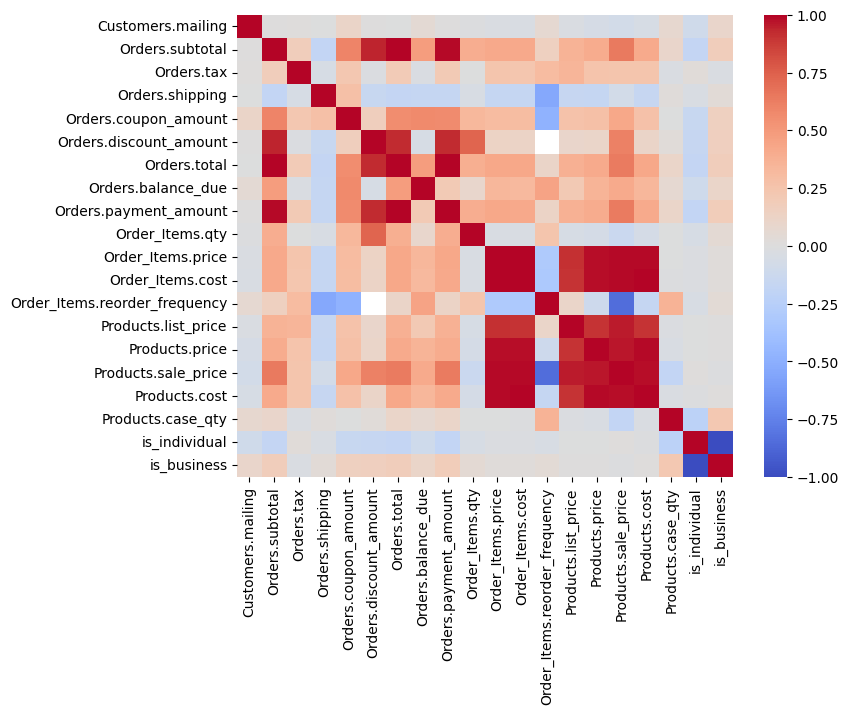

In [337]:
plt.figure(figsize=(8, 6), dpi=100)
corr = df.corr(numeric_only=True)

sns.heatmap(corr, 
            cmap="coolwarm",
            center=0,
            annot=False)

plt.show()

* * *

### **CUSTOMER**

In [310]:
print("Customers: ", df_customers['Customers.id'].nunique())

business_customers = (df_customers['Customers.company'] != "Individual").sum()
print("Business Customers:", business_customers)

business_company = df_customers['Customers.company'].nunique() - 1 # ohne Individual
print("Business Company: ", business_company)

individual_customers = (df_customers['Customers.company'] == "Individual").sum()
print("Individual Customers:", individual_customers) 

Customers:  3054
Business Customers: 464
Business Company:  428
Individual Customers: 2590


C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\2888886542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


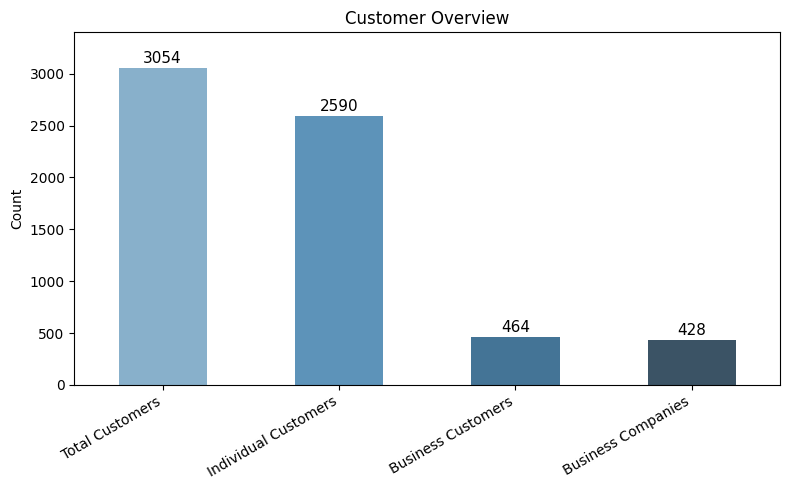

In [338]:
metrics = {
    "Total Customers": df_customers['Customers.id'].nunique(),
    "Business Customers": (df_customers['Customers.company'] != "Individual").sum(),
    "Business Companies": df_customers['Customers.company'].nunique() - 1,
    "Individual Customers": (df_customers['Customers.company'] == "Individual").sum()
}

df_metrics = pd.DataFrame(list(metrics.items()), columns=["Category", "Count"])

# Desired order
order = [
    "Total Customers",
    "Individual Customers",
    "Business Customers",
    "Business Companies"
]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_metrics,
    x="Category",
    y="Count",
    width=0.5,
    palette="Blues_d",
    order=order
)

# Add labels
for index, row in df_metrics.set_index("Category").loc[order].iterrows():
    plt.text(order.index(index), row["Count"] + 50, str(row["Count"]),
             ha='center', fontsize=11)

plt.ylim(0, 3400)
plt.title("Customer Overview")
plt.ylabel("Count")
plt.xlabel("")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [341]:
df['is_individual'] = df['Customers.company'] == "Individual"
df['is_business'] = df['Customers.company'] != "Individual"

individual_revenue = df[df['is_individual']]['Orders.total'].sum()
business_revenue = df[df['is_business']]['Orders.total'].sum()

print("Individual revenue:", individual_revenue, "USD")
print("Business revenue:", business_revenue, "USD")

# !ohne unique Order

Individual revenue: 411659.19 USD
Business revenue: 163727.49 USD


In [293]:
total_revenue = df['Orders.total'].sum()

print("Individual share:", round((individual_revenue / total_revenue * 100),2), "%")
print("Business share:", round((business_revenue / total_revenue * 100),2), "%")

Individual share: 71.54 %
Business share: 28.46 %


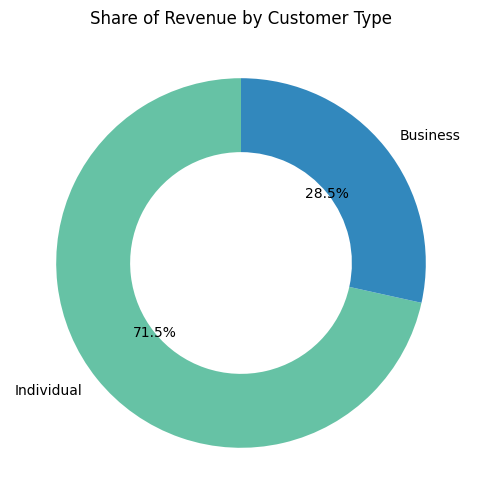

In [342]:
sizes = [individual_revenue, business_revenue]
labels = ["Individual", "Business"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=["#66c2a5", "#3288bd"], wedgeprops={'width':0.4})

plt.title("Share of Revenue by Customer Type")
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\1634752672.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\1634752672.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\1634752672.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\1634752672.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

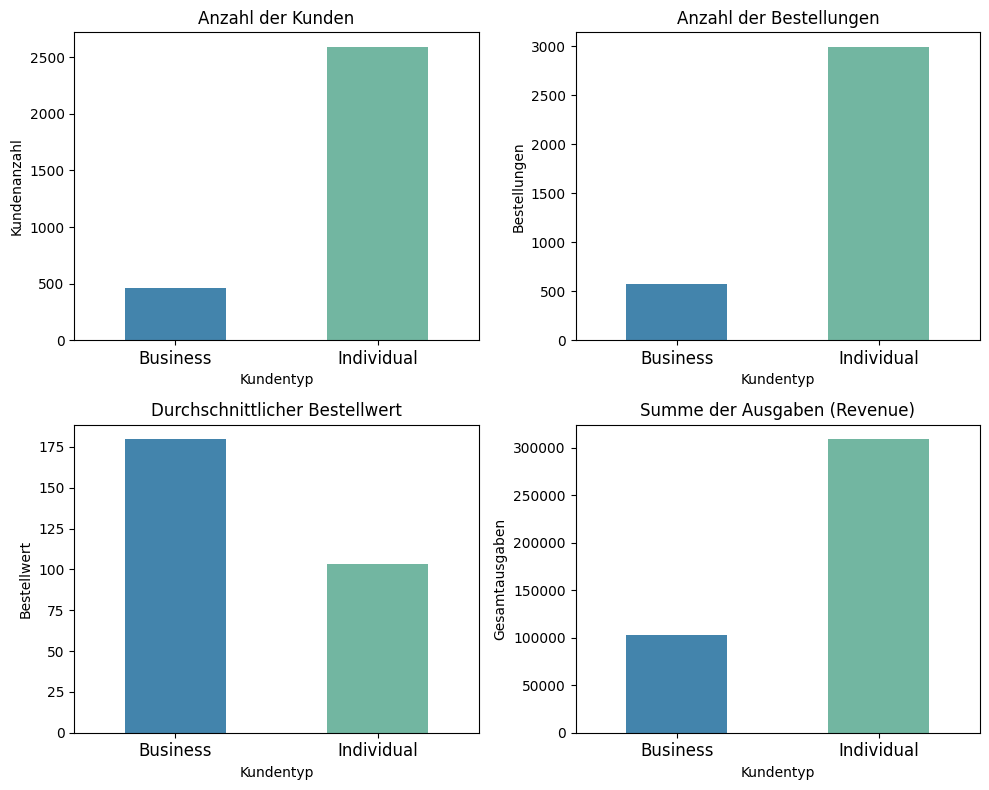

  customer_type  customer_count
0      Business             464
1    Individual            2590 

  customer_type  Orders.total
0      Business    179.576918
1    Individual    103.119686 

  customer_type  order_count
0      Business          571
1    Individual         2994 

  customer_type  total_spent
0      Business    102538.42
1    Individual    308740.34


In [344]:
# ---- COLORS ----
colors = {
    "Individual": "#66c2a5",
    "Business": "#3288bd"
}

# ==================CUSTOMER DATA========================
customers_unique = df.drop_duplicates(subset='Customers.id').copy()


customers_unique['customer_type'] = customers_unique['Customers.company'].map(
    lambda x: "Business" if x != "Individual" else "Individual"
)

customer_counts = (
    customers_unique.groupby('customer_type')['Customers.id']
    .count()
    .reset_index(name='customer_count')
    .sort_values('customer_type')
)

customer_colors = [colors[x] for x in customer_counts['customer_type']]

# ===================ORDER DATA=======================
orders_unique = df.drop_duplicates(subset='Orders.id').copy()

orders_unique['customer_type'] = orders_unique['is_business'].map({
    True: 'Business',
    False: 'Individual'
})

# ---- Mean order value ----
mean_values = (
    orders_unique.groupby('customer_type')['Orders.total']
    .mean()
    .reset_index()
    .sort_values('customer_type')
)

mean_colors = [colors[x] for x in mean_values['customer_type']]

# ---- Order count ----
order_counts = (
    orders_unique.groupby('customer_type')['Orders.id']
    .count()
    .reset_index(name='order_count')
    .sort_values('customer_type')
)

count_colors = [colors[x] for x in order_counts['customer_type']]

# ---- TOTAL SPENT (sum of Orders.total) ----
total_spent = (
    orders_unique.groupby('customer_type')['Orders.total']
    .sum()
    .reset_index(name='total_spent')
    .sort_values('customer_type')
)

total_colors = [colors[x] for x in total_spent['customer_type']]


# ===================PLOT=======================
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# === (1) CUSTOMER COUNT ===
sns.barplot(
    data=customer_counts,
    x='customer_type', y='customer_count',
    palette=customer_colors, width=0.5,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Anzahl der Kunden")
axes[0, 0].set_xlabel("Kundentyp")
axes[0, 0].set_ylabel("Kundenanzahl")
axes[0, 0].tick_params(axis='x', labelsize=12)

# === (2) ORDER COUNT ===
sns.barplot(
    data=order_counts,
    x='customer_type', y='order_count',
    palette=count_colors, width=0.5,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Anzahl der Bestellungen")
axes[0, 1].set_xlabel("Kundentyp")
axes[0, 1].set_ylabel("Bestellungen")
axes[0, 1].tick_params(axis='x', labelsize=12)

# === (3) MEAN ORDER VALUE ===
sns.barplot(
    data=mean_values,
    x='customer_type', y='Orders.total',
    palette=mean_colors, width=0.5,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Durchschnittlicher Bestellwert")
axes[1, 0].set_xlabel("Kundentyp")
axes[1, 0].set_ylabel("Bestellwert")
axes[1, 0].tick_params(axis='x', labelsize=12)


# === (4) TOTAL SPENT ===
sns.barplot(
    data=total_spent,
    x='customer_type', y='total_spent',
    palette=total_colors, width=0.5,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Summe der Ausgaben (Revenue)")
axes[1, 1].set_xlabel("Kundentyp")
axes[1, 1].set_ylabel("Gesamtausgaben")
axes[1, 1].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

# ===================TABLE=======================
print(customer_counts, "\n")
print(mean_values, "\n")
print(order_counts, "\n")
print(total_spent)

* * *

### **ORDER**

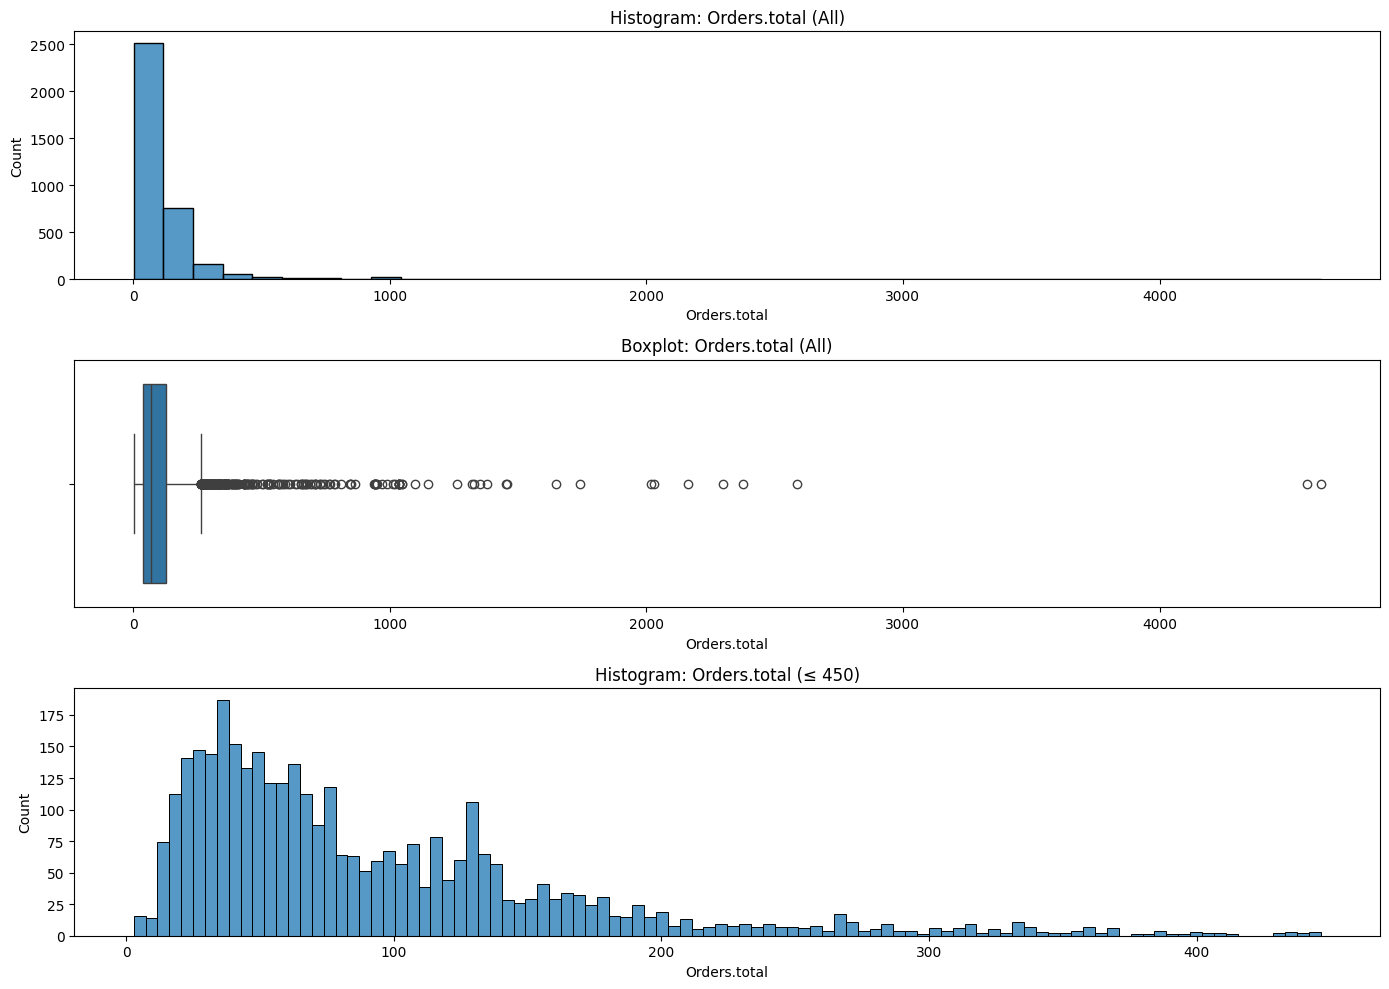

In [345]:
plt.figure(figsize=(14, 10))

# =================== 1. Histogram: all Orders.total 
plt.subplot(3, 1, 1)
sns.histplot(df_orders['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# =================== 2. Boxplot: all Orders.total 
plt.subplot(3, 1, 2)
sns.boxplot(x=df_orders['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# =================== 3. Histogram: Orders.total <= 450 
plt.subplot(3, 1, 3)
sns.histplot(df_orders[df_orders['Orders.total'] <= 450]['Orders.total'], bins=100)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

In [ ]:
print("----------------------------------------------------\n")
print("   Kreuztabelle: Bestellstatus nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")

ct_status = pd.crosstab(df_orders["Orders.status"], df_orders["Orders.payment_status"])
ct_status

----------------------------------------------------

   Kreuztabelle: Bestellstatus -- Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.status,,,,
Cancelled,13,11,0,0
Completed,3295,0,4,18
Error,1,0,0,0
On Hold,12,0,0,0
Pending,7,15,0,0
Refunded,101,9,1,0
Shipped,53,2,0,2
Unknown,3,1,0,0
Validation Required,17,0,0,0


In [368]:
print("----------------------------------------------------\n")
print("            Zahlungsart nach Zahlungsstatus  \n")
print("----------------------------------------------------\n")
ct_pay_method = pd.crosstab(df_orders["Orders.payment_method"], df_orders["Orders.payment_status"])
ct_pay_method

----------------------------------------------------

            Zahlungsart nach Zahlungsstatus  

----------------------------------------------------



Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,2,0,0,0
Check,24,0,0,0
Credit Card,360,0,5,6
PayPal,281,0,0,0
authorize.net,2835,38,0,0


In [369]:
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)

# discount_name є завжди, але треба перевірити, чи там "No Discount", "" або NaN
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

In [377]:
print("----------------------------------------------------\n")
print("  Kreuztabelle: Orders.status -- Feature-Indikatoren  \n")
print("----------------------------------------------------\n")

ct_features = df_orders.groupby("Orders.status", observed=True)[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "has_coupon",
    "has_discount"
]].sum()

ct_features

----------------------------------------------------

  Kreuztabelle: Orders.status -- Feature-Indikatoren  

----------------------------------------------------



,has_reorder,has_tax,has_shipping,has_coupon,has_discount
Orders.status,,,,,
Cancelled,1,1,17,3,0
Completed,61,235,2322,598,258
Error,0,0,0,0,0
On Hold,0,1,7,2,3
Pending,0,2,9,3,1
Refunded,0,7,67,22,2
Shipped,1,12,41,5,3
Unknown,0,0,3,0,0
Validation Required,0,3,10,7,0


C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\1321462381.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct_features = df_orders.groupby("Orders.status")[[


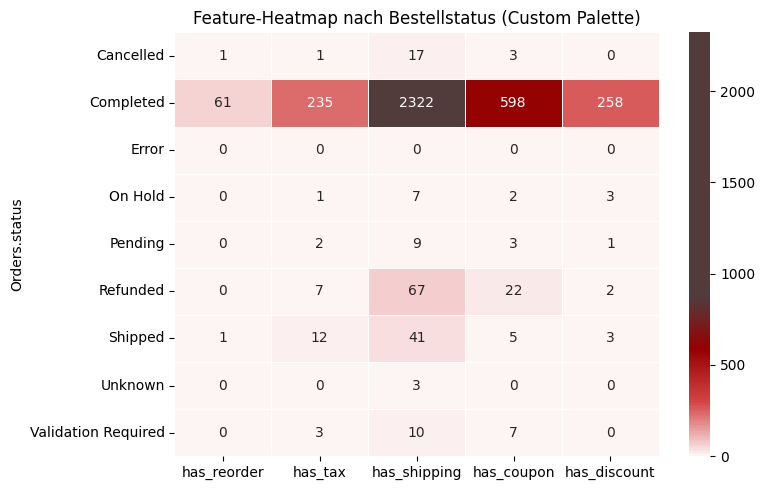

In [458]:
# ---------- 1. Бінарні колонки ----------
df_orders["has_reorder"] = df_orders["Orders.reorder_id"].notna().astype(int)
df_orders["has_tax"] = (df_orders["Orders.tax"] > 0).astype(int)
df_orders["has_shipping"] = (df_orders["Orders.shipping"] > 0).astype(int)
df_orders["has_coupon"] = df_orders["Orders.coupon_id"].notna().astype(int)
df_orders["has_discount"] = df_orders["Orders.discount_name"].ne("No Discount").astype(int)

# ---------- 2. Крос-таблиця ----------
ct_features = df_orders.groupby("Orders.status")[[
    "has_reorder",
    "has_tax",
    "has_shipping",
    "has_coupon",
    "has_discount"
]].sum()

# ---------- 3. Heatmap ----------
colors = [
    "#fdf4f4",  # 0%
    "#D34646",  # 10%
    "#970000",  # 25%
    "#523B3B",  
    "#523B3B",  # 50%
    "#523B3B", 
    "#523B3B",  # 75%
    "#523B3B",   
    "#523B3B",  # 100%         
]

custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus (Custom Palette)")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

In [ ]:


custom_cmap = LinearSegmentedColormap.from_list("custom_heatmap", colors)

plt.figure(figsize=(8, 5))
sns.heatmap(
    ct_features,
    annot=True,
    fmt="d",
    cmap=custom_cmap,
    linewidths=0.5,
    linecolor="white"
)

plt.title("Feature-Heatmap nach Bestellstatus (Custom Palette)")
plt.ylabel("Orders.status")
plt.tight_layout()
plt.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\3053164263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)


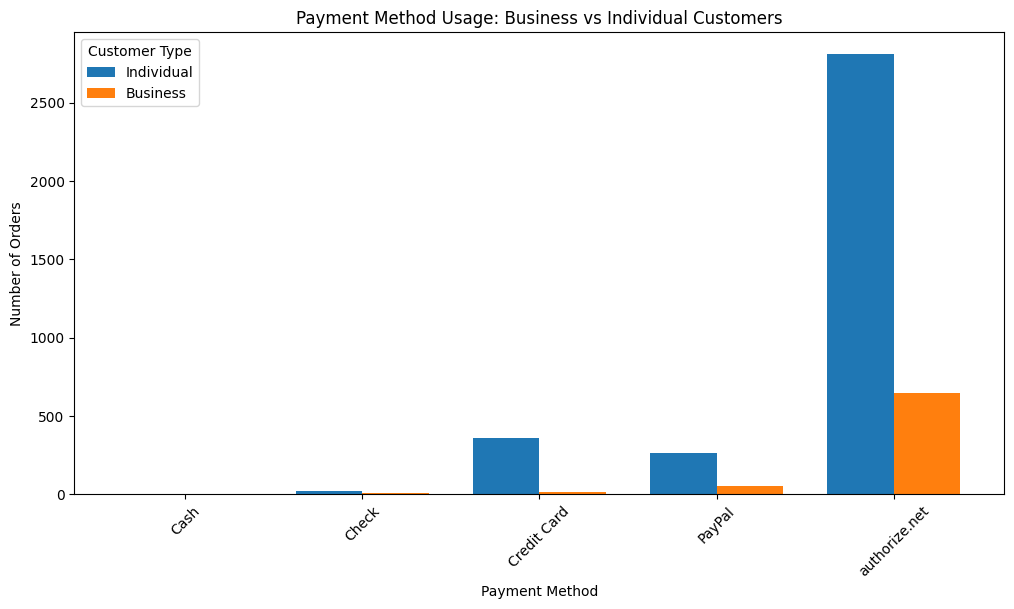

In [416]:
payment_method_segment = df.groupby(['Orders.payment_method', 'is_business']).size().unstack(fill_value=0)
payment_method_segment.columns = ['Individual', 'Business']  

payment_method_segment.plot(
    kind='bar',
    figsize=(12, 6),
    width=0.75
)

plt.title('Payment Method Usage: Business vs Individual Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')

plt.show()

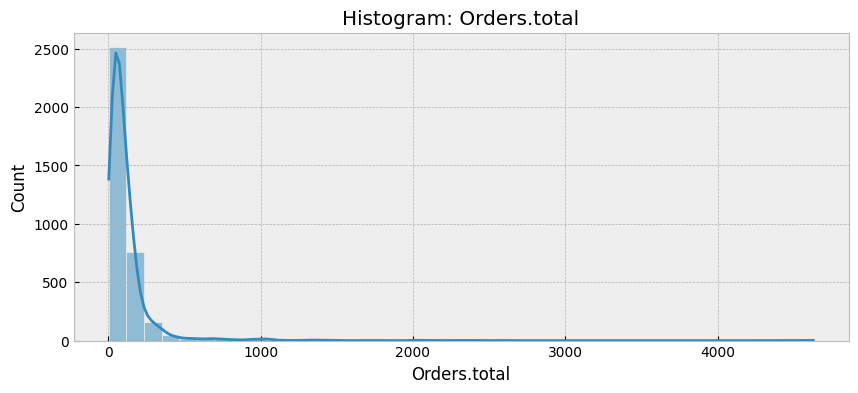

In [185]:
plt.figure(figsize=(10,4))
sns.histplot(df_orders['Orders.total'], bins=40, kde=True)
plt.title("Histogram: Orders.total")
plt.xlabel("Orders.total")
plt.ylabel("Count")
plt.show()

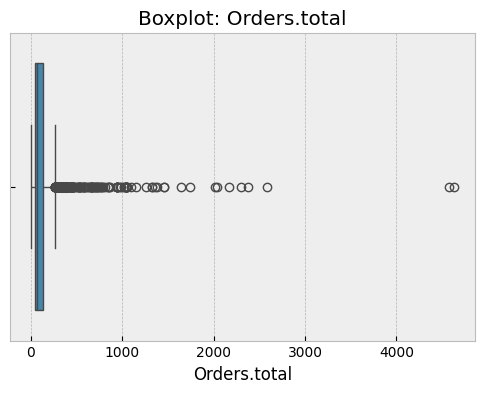

In [186]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_orders['Orders.total'])
plt.title("Boxplot: Orders.total")
plt.xlabel("Orders.total")
plt.show()

In [36]:
### --- outliers investigation ---
#df_orders[df_orders['Orders.total'] > 1500].sort_values(by='Orders.total', ascending=False)

df_orders[df_orders['Orders.total'] > 1500] \
    .sort_values(by='Orders.total', ascending=False) \
    [['Orders.id', 'Orders.customer_id', 'Orders.total', 'Orders.payment_amount' ]]

,Orders.id,Orders.customer_id,Orders.total,Orders.payment_amount
473,2144,442,4627.95,4627.95
2936,14924,3006,4575.00,4575.00
3129,15657,3234,2588.00,2588.00
2035,10729,2022,2375.59,2375.59
128,572,143,2300.00,2300.00
3083,15457,3174,2164.30,2164.30
1931,9742,1918,2031.93,2031.93
2510,12835,2539,2017.92,NaN
2511,12836,2540,1740.00,580.00
203,965,218,1647.06,1548.06


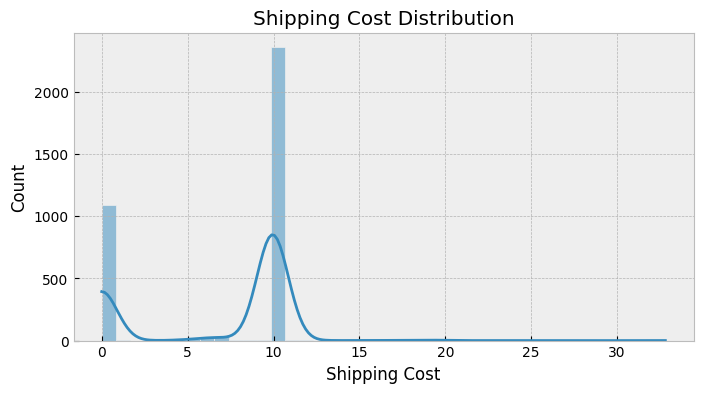

In [187]:
plt.figure(figsize=(8, 4))

sns.histplot(
    df_orders,
    x='Orders.shipping',
    bins=40,
    kde=True
)

plt.title('Shipping Cost Distribution')
plt.xlabel('Shipping Cost')
plt.ylabel('Count')
plt.show()

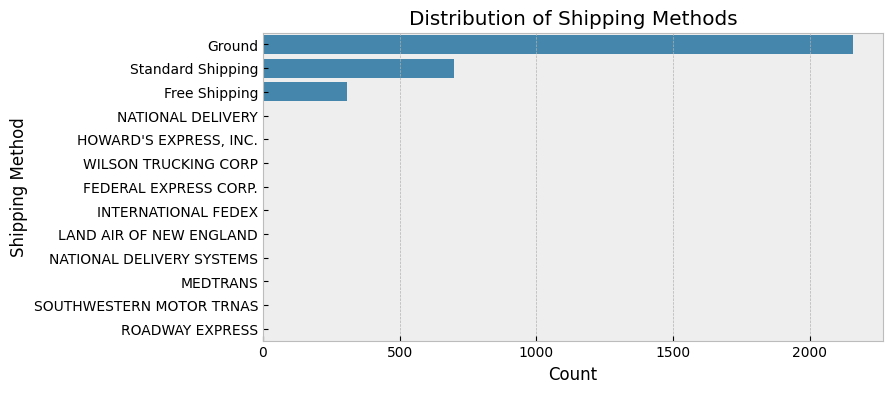

In [188]:
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df_orders,
    y='Orders.shipping_method',
    order=df_orders['Orders.shipping_method'].value_counts().index
)

plt.title('Distribution of Shipping Methods')
plt.xlabel('Count')
plt.ylabel('Shipping Method')
plt.show()

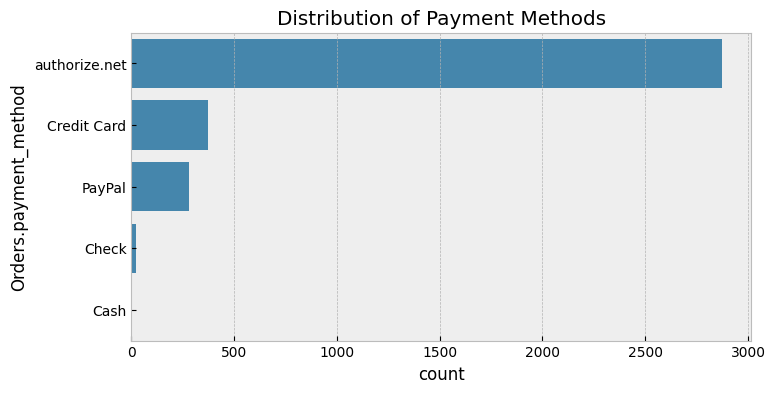

In [189]:
plt.figure(figsize=(8, 4))

sns.countplot(
    data=df_orders,
    y='Orders.payment_method',
    order=df_orders['Orders.payment_method'].value_counts().index
)

plt.title('Distribution of Payment Methods')
plt.show()

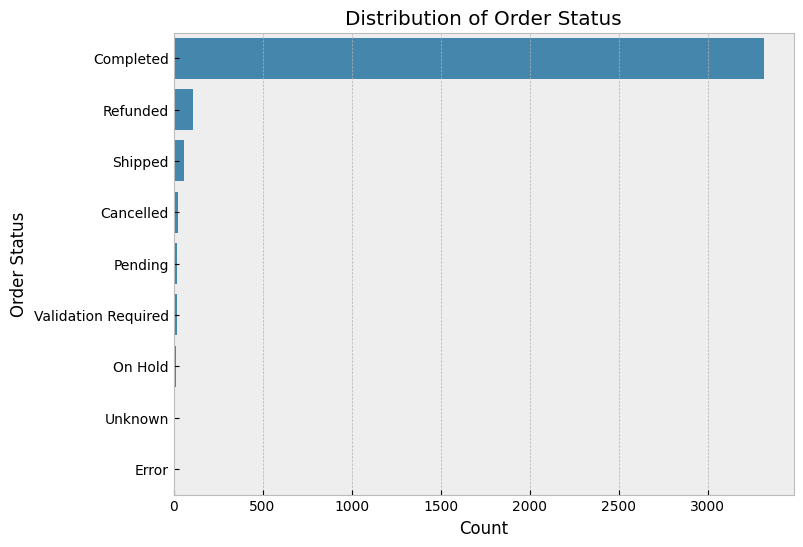

In [190]:
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df_orders,
    y='Orders.status',
    order=df_orders['Orders.status'].value_counts().index
)

plt.title('Distribution of Order Status')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.show()



In [119]:
pd.crosstab(
    df_orders['Orders.payment_method'],
    df_orders['Orders.payment_status'],
    normalize='index'
) * 100

Orders.payment_status,Paid,Pending,Unknown,Unpaid
Orders.payment_method,,,,
Cash,100.000000,0.000000,0.000000,0.000000
Check,100.000000,0.000000,0.000000,0.000000
Credit Card,97.035040,0.000000,1.347709,1.617251
PayPal,100.000000,0.000000,0.000000,0.000000
authorize.net,98.677341,1.322659,0.000000,0.000000


C:\Users\Anna\AppData\Local\Temp\ipykernel_23048\2407057966.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df_orders.groupby('Orders.payment_method')['Orders.total']


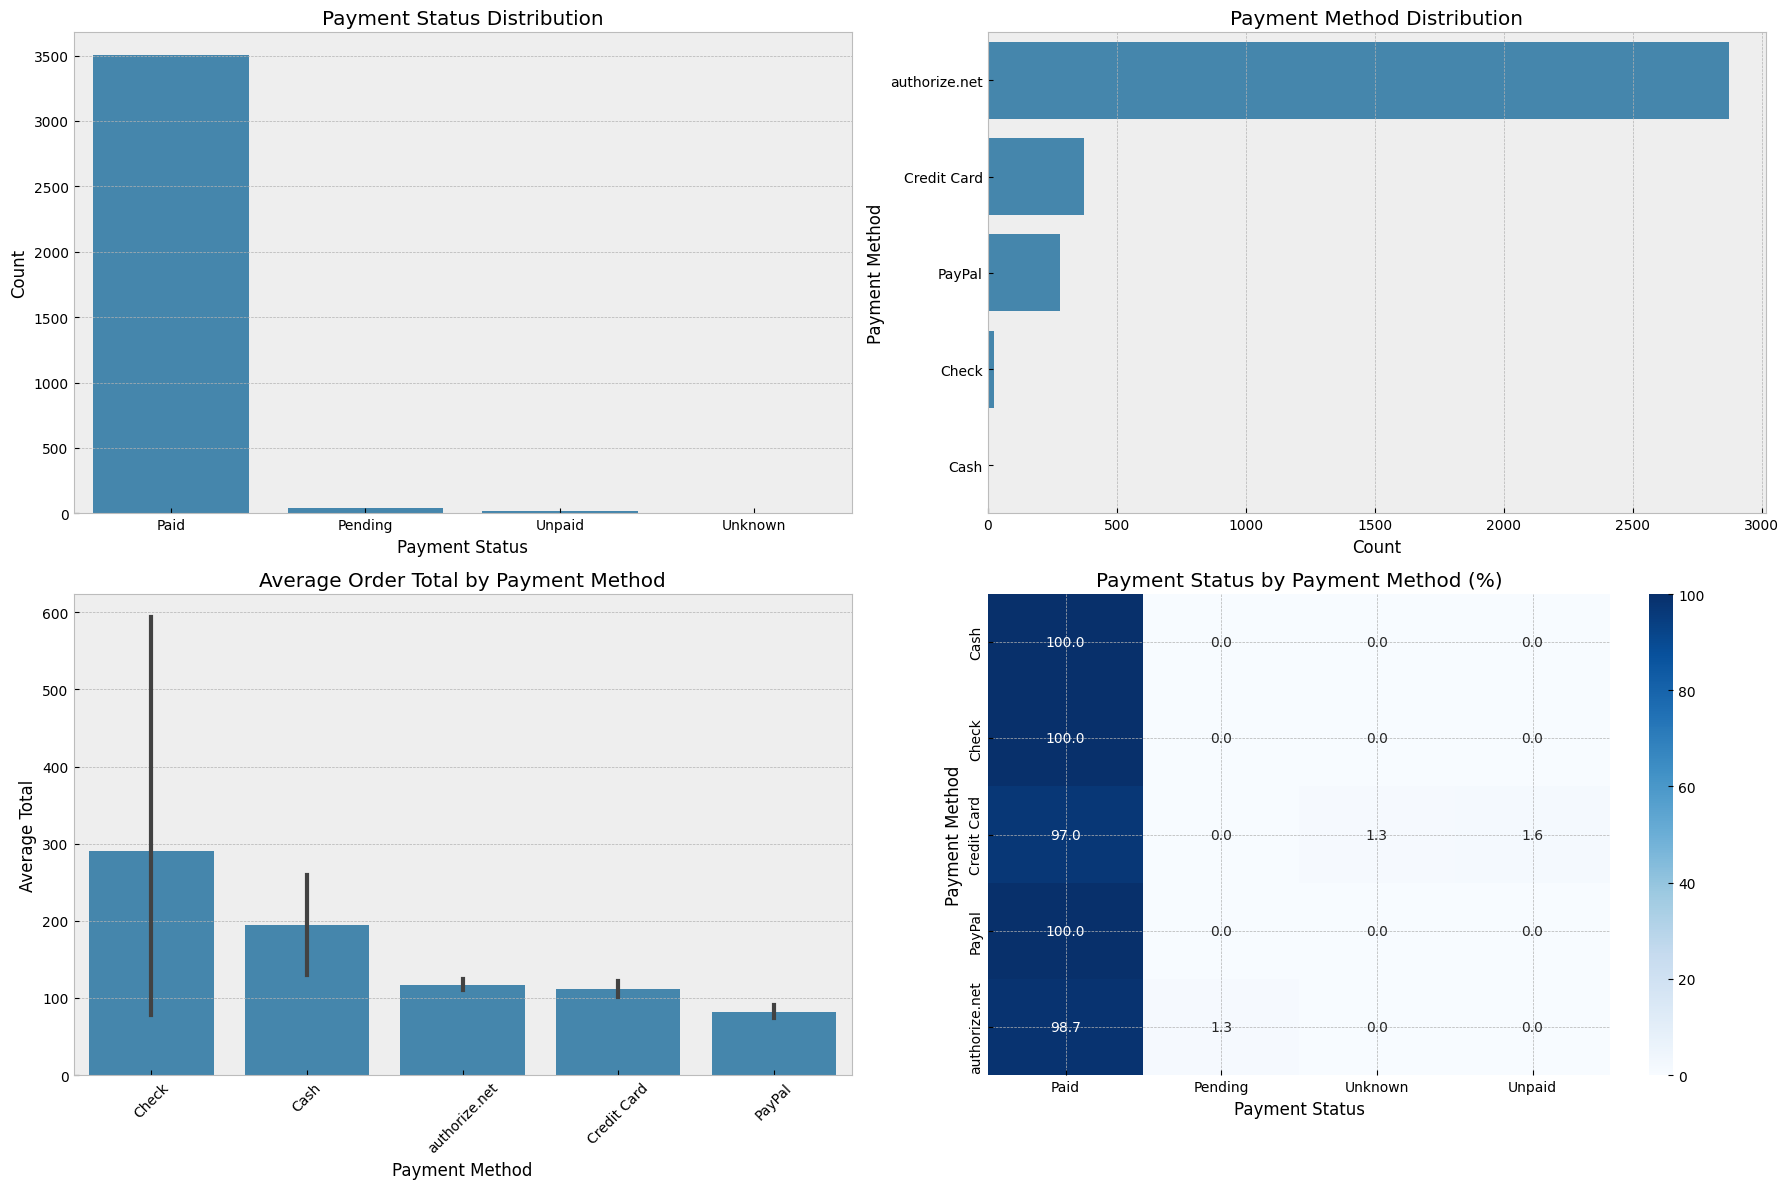

In [191]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# === 1. Payment Status Distribution ===
sns.countplot(
    data=df_orders,
    x='Orders.payment_status',
    order=df_orders['Orders.payment_status'].value_counts().index,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Payment Status Distribution')
axes[0, 0].set_xlabel('Payment Status')
axes[0, 0].set_ylabel('Count')


# === 2. Payment Method Distribution ===
sns.countplot(
    data=df_orders,
    y='Orders.payment_method',
    order=df_orders['Orders.payment_method'].value_counts().index,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Payment Method Distribution')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Payment Method')


# === 3. Average Order Total by Payment Method ===
sns.barplot(
    data=df_orders,
    x='Orders.payment_method',
    y='Orders.total',
    estimator='mean',
    order=df_orders.groupby('Orders.payment_method')['Orders.total']
                    .mean()
                    .sort_values(ascending=False)
                    .index,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Average Order Total by Payment Method')
axes[1, 0].set_xlabel('Payment Method')
axes[1, 0].set_ylabel('Average Total')
axes[1, 0].tick_params(axis='x', rotation=45)


# === 4. Crosstab: Payment Status by Payment Method ===
ct = pd.crosstab(df_orders['Orders.payment_method'], df_orders['Orders.payment_status'], normalize='index') * 100
sns.heatmap(ct, annot=True, fmt=".1f", cmap='Blues', ax=axes[1, 1])

axes[1, 1].set_title('Payment Status by Payment Method (%)')
axes[1, 1].set_xlabel('Payment Status')
axes[1, 1].set_ylabel('Payment Method')


plt.tight_layout()
plt.show()

In [122]:
orders_per_customer = df_orders['Orders.customer_id'].value_counts()
orders_per_customer

Orders.customer_id
851     18
515     15
1371    15
403     15
1043    14
        ..
59       1
60       1
61       1
62       1
3698     1
Name: count, Length: 3054, dtype: int64

In [124]:
aov_per_customer = df_orders.groupby('Orders.customer_id')['Orders.total'].mean()
aov_per_customer

Orders.customer_id
3        54.360000
4        29.550000
5        41.663333
7        49.140000
8        69.700000
           ...    
3730     16.060000
3732     39.990000
3733    989.100000
3735    129.990000
3736     24.540000
Name: Orders.total, Length: 3054, dtype: float64

In [132]:
df_orders['has_discount'] = df_orders['Orders.discount_amount'].fillna(0) > 0
discount_usage = df_orders.groupby('Orders.customer_id')['has_discount'].mean()
discount_usage[discount_usage > 0]


Orders.customer_id
10      1.0
11      1.0
13      0.5
21      1.0
25      1.0
       ... 
3473    1.0
3487    1.0
3540    1.0
3653    1.0
3654    1.0
Name: has_discount, Length: 320, dtype: float64

In [133]:
df_orders[df_orders['has_discount'] == True]


np.float64(0.10478061558611657)

In [141]:
#df_orders

Customers:  3054
Business Customers: 464
Business company:  428
Individual Customers: 2590


In [ ]:
plt.figure(figsize=(8, 4))

sns.histplot(data=df, x='Order_Items.cost', bins=40)

plt.title("Order_Items.cost (USD)")

plt.show()

In [ ]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()

In [ ]:
top_company = df['Orders.company'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_company.values, y=top_company.index)
plt.title("Top 10 OrdersCompany")
plt.xlabel("Orders Count")
plt.show()

In [204]:
df['Products.taxable'].isna().sum()

np.int64(1235)

In [216]:
df_products['Products.taxable'].unique()
#df_products[df_products['Products.taxable'].isna()]
#df_products[df_products['Products.taxable'].isna()][['Products.id', 'Products.name', 'Products.taxable']]



array(['taxable', 'unknown', 'not taxable'], dtype=object)

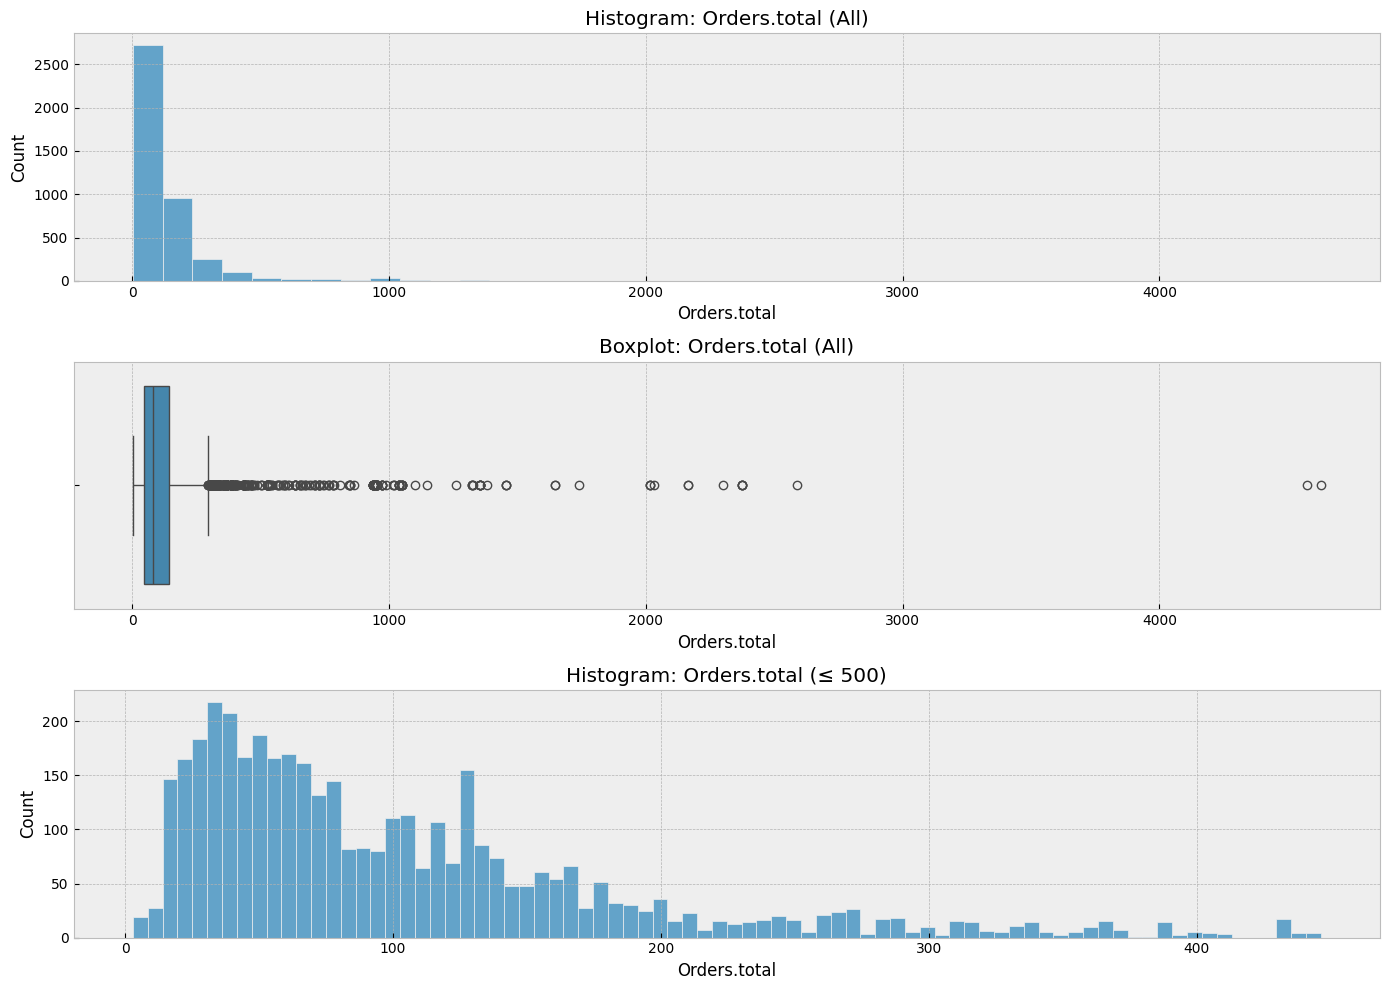

In [228]:
plt.figure(figsize=(14, 10))

# --- 1. Histogram: all Orders.total ---
plt.subplot(3, 1, 1)
sns.histplot(df['Orders.total'], bins=40)
plt.title('Histogram: Orders.total (All)')

# --- 2. Boxplot: all Orders.total ---
plt.subplot(3, 1, 2)
sns.boxplot(x=df['Orders.total'])
plt.title('Boxplot: Orders.total (All)')

# --- 3. Histogram: Orders.total <= 450 ---
plt.subplot(3, 1, 3)
sns.histplot(df[df['Orders.total'] <= 450]['Orders.total'], bins=80)
plt.title('Histogram: Orders.total (≤ 450)')

plt.tight_layout()
plt.show()

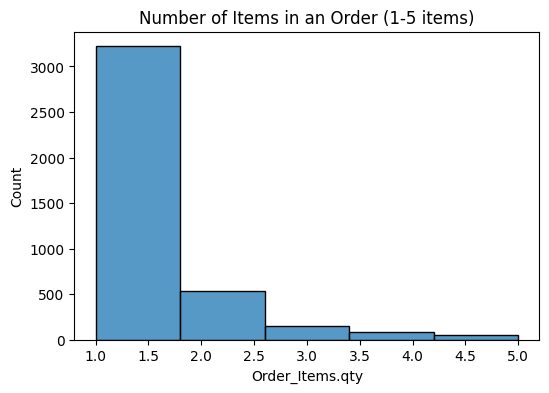

In [237]:
small_qty = df[df['Order_Items.qty'] <= 5]

plt.figure(figsize=(6, 4))

sns.histplot(data=small_qty, x='Order_Items.qty', bins=5)

plt.title('Number of Items in an Order (1-5 items)')

plt.show()